In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/8° Semestre/IA M2 Benji"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/8° Semestre/IA M2 Benji
 augmented   Augmented	'Copia de Model Tunning.ipynb'	 Dataset2_1   images


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.15.0


In [4]:
base_dir = 'Dataset2_1'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')

class_names = sorted(os.listdir(train_dir))
class_labels = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
    'K': 10, 'L': 11, 'M': 12, 'N': 13, 'Nothing': 14, 'O': 15, 'P': 16, 'Q': 17,
    'R': 18, 'S': 19, 'Space': 20, 'T': 21, 'U': 22, 'V': 23, 'W': 24, 'X': 25,
    'Y': 26, 'Z': 27
}

In [13]:
def rename_images_with_labels(dataset_dir):
    class_names = os.listdir(dataset_dir)

    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            files = os.listdir(class_dir)
            files.sort()
            for i, file_name in enumerate(files, start=1):
                file_ext = os.path.splitext(file_name)[1]
                new_file_name = f"{class_name}{i}{file_ext}"
                os.rename(os.path.join(class_dir, file_name), os.path.join(class_dir, new_file_name))
                print(f"Renamed: {file_name} to {new_file_name}")

rename_images_with_labels(train_dir)

Streaming output truncated to the last 5000 lines.
Renamed: 10.jpg to U1.jpg
Renamed: 100.jpg to U2.jpg
Renamed: 1000.jpg to U3.jpg
Renamed: 1001.jpg to U4.jpg
Renamed: 1002.jpg to U5.jpg
Renamed: 1003.jpg to U6.jpg
Renamed: 1004.jpg to U7.jpg
Renamed: 1005.jpg to U8.jpg
Renamed: 1006.jpg to U9.jpg
Renamed: 1007.jpg to U10.jpg
Renamed: 1008.jpg to U11.jpg
Renamed: 1009.jpg to U12.jpg
Renamed: 101.jpg to U13.jpg
Renamed: 1010.jpg to U14.jpg
Renamed: 1011.jpg to U15.jpg
Renamed: 1012.jpg to U16.jpg
Renamed: 1013.jpg to U17.jpg
Renamed: 1014.jpg to U18.jpg
Renamed: 1015.jpg to U19.jpg
Renamed: 1016.jpg to U20.jpg
Renamed: 1017.jpg to U21.jpg
Renamed: 1018.jpg to U22.jpg
Renamed: 102.jpg to U23.jpg
Renamed: 103.jpg to U24.jpg
Renamed: 109.jpg to U25.jpg
Renamed: 118.jpg to U26.jpg
Renamed: 119.jpg to U27.jpg
Renamed: 129.jpg to U28.jpg
Renamed: 138.jpg to U29.jpg
Renamed: 157.jpg to U30.jpg
Renamed: 1753.jpg to U31.jpg
Renamed: 1754.jpg to U32.jpg
Renamed: 1755.jpg to U33.jpg
Renamed: 1756

In [21]:
rename_images_with_labels(test_dir)

Streaming output truncated to the last 5000 lines.
Renamed: 1155.jpg to J151.jpg
Renamed: 1156.jpg to J152.jpg
Renamed: 1157.jpg to J153.jpg
Renamed: 1158.jpg to J154.jpg
Renamed: 1159.jpg to J155.jpg
Renamed: 1160.jpg to J156.jpg
Renamed: 1161.jpg to J157.jpg
Renamed: 1162.jpg to J158.jpg
Renamed: 1163.jpg to J159.jpg
Renamed: 1164.jpg to J160.jpg
Renamed: 1165.jpg to J161.jpg
Renamed: 1166.jpg to J162.jpg
Renamed: 1167.jpg to J163.jpg
Renamed: 1168.jpg to J164.jpg
Renamed: 1169.jpg to J165.jpg
Renamed: 1170.jpg to J166.jpg
Renamed: 1171.jpg to J167.jpg
Renamed: 1172.jpg to J168.jpg
Renamed: 1173.jpg to J169.jpg
Renamed: 1174.jpg to J170.jpg
Renamed: 1175.jpg to J171.jpg
Renamed: 1176.jpg to J172.jpg
Renamed: 1177.jpg to J173.jpg
Renamed: 1178.jpg to J174.jpg
Renamed: 1179.jpg to J175.jpg
Renamed: 1180.jpg to J176.jpg
Renamed: 1181.jpg to J177.jpg
Renamed: 1182.jpg to J178.jpg
Renamed: 1183.jpg to J179.jpg
Renamed: 1184.jpg to J180.jpg
Renamed: 1185.jpg to J181.jpg
Renamed: 1186.jpg t

In [4]:
len(class_labels)

28

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=tf.image.rgb_to_grayscale,
    validation_split=0.2
    )
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )

Found 22400 images belonging to 28 classes.
Found 5600 images belonging to 28 classes.
Found 6900 images belonging to 28 classes.


<Figure size 640x480 with 0 Axes>

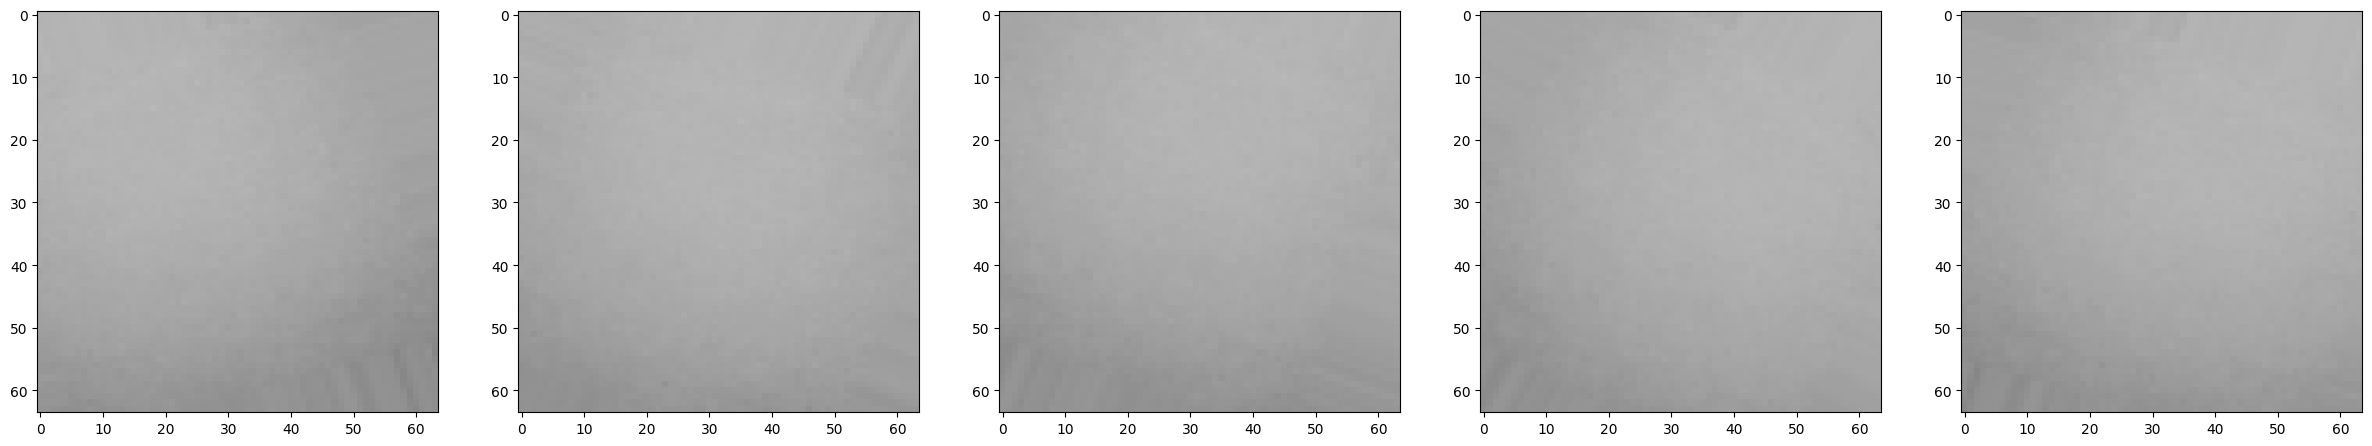

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode='sparse',
    subset='training',
    classes=class_names,  # Pass class labels
    shuffle=True,
    seed=42
    )

validation_generator = train_datagen.flow_from_directory(
    'Dataset2_1/Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    classes=class_names,  # Pass class labels
    shuffle=True,
    seed=42
    )
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    classes=class_names,
    shuffle=False
    )

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0], cmap='gray')

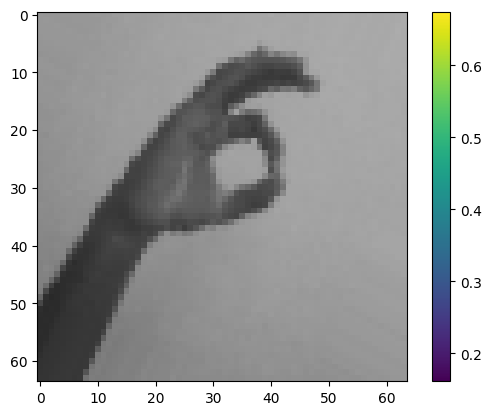

In [8]:
batch_images, batch_labels = train_generator.next()
plt.figure()
plt.imshow(batch_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

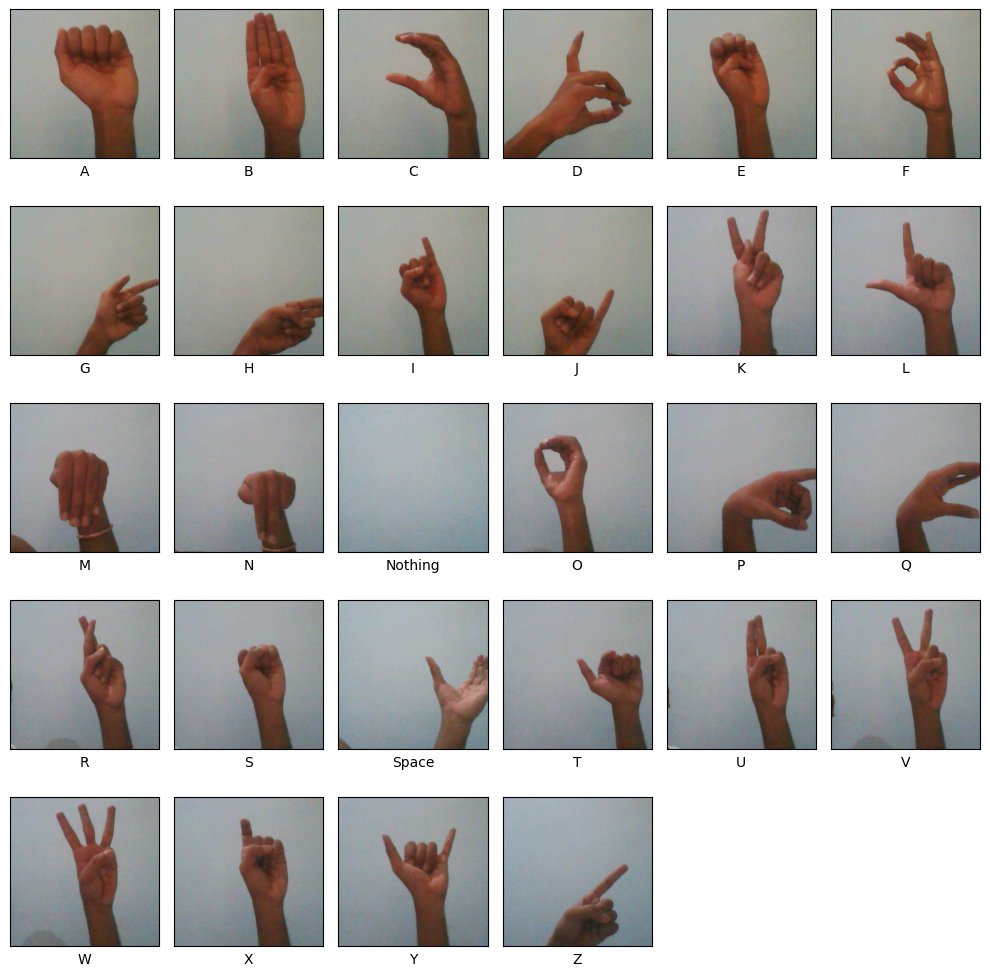

In [9]:
plt.figure(figsize=(10, 10))
images_per_class = 1
images_shown = 0
class_counts = {class_name: 0 for class_name in class_names}

for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        class_files = os.listdir(class_dir)
        if class_files:
            class_files.sort()
            image_path = os.path.join(class_dir, class_files[0])
            image = plt.imread(image_path)
            plt.subplot(5, 6, images_shown + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(image, cmap=plt.cm.binary)
            plt.xlabel(class_name)
            images_shown += 1
            if images_shown >= len(class_names) * images_per_class:
                break

plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras import optimizers, callbacks
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

Epoch 1/10
700/700 [==============================] - 4411s 6s/step - loss: 2.7973 - accuracy: 0.1479 - val_loss: 1.8347 - val_accuracy: 0.4030
Epoch 2/10
700/700 [==============================] - 441s 630ms/step - loss: 1.1372 - accuracy: 0.6104 - val_loss: 0.6273 - val_accuracy: 0.8055
Epoch 3/10
700/700 [==============================] - 432s 617ms/step - loss: 0.4479 - accuracy: 0.8484 - val_loss: 0.3037 - val_accuracy: 0.9071
Epoch 4/10
700/700 [==============================] - 502s 718ms/step - loss: 0.2529 - accuracy: 0.9210 - val_loss: 0.2104 - val_accuracy: 0.9496
Epoch 5/10
700/700 [==============================] - 461s 659ms/step - loss: 0.1699 - accuracy: 0.9461 - val_loss: 0.1771 - val_accuracy: 0.9468
Epoch 6/10
700/700 [==============================] - 516s 737ms/step - loss: 0.1296 - accuracy: 0.9603 - val_loss: 0.1689 - val_accuracy: 0.9582
Epoch 7/10
700/700 [==============================] - 460s 656ms/step - loss: 0.1025 - accuracy: 0.9698 - val_loss: 0.1500 - v

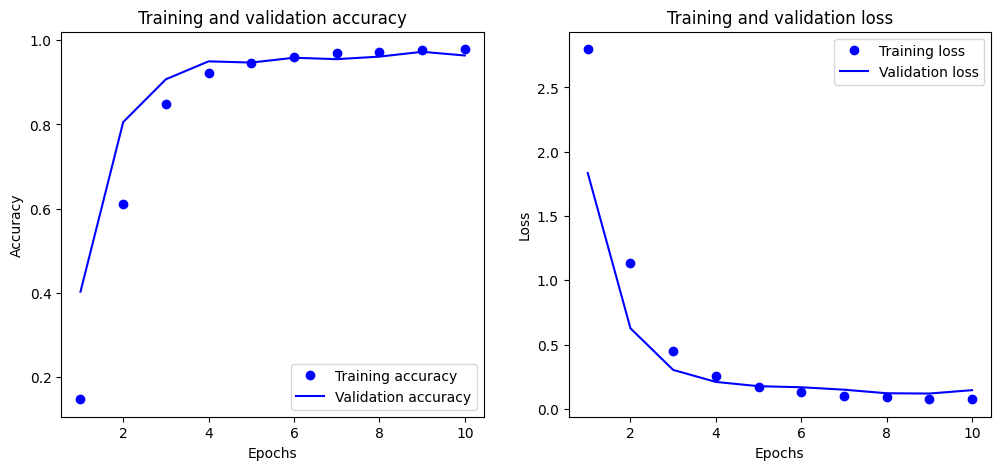

In [11]:
def early_stopping(monitor='val_loss', min_delta=0, patience=5):
    return callbacks.EarlyStopping(monitor=monitor, min_delta=min_delta, patience=patience, restore_best_weights=True)
early_stop = early_stopping(monitor='val_loss', patience=3)  # Monitor validation loss

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
model.save("ModelASL.keras")

In [19]:
# evaluate the model using images generated for test and the labels
num_test_samples = len(test_generator.filenames)
num_test_steps = num_test_samples // test_generator.batch_size

# Evaluate the model on the test data generator
test_loss, test_acc = model.evaluate(test_generator, steps=num_test_steps)
print('\nTest accuracy:', test_acc)
predictions = model.predict(test_generator)
predict_class = np.argmax(predictions, axis=1)
predict_class.shape

215/215 [==============================] - 75s 349ms/step - loss: 0.0798 - accuracy: 0.9776

Test accuracy: 0.9776162505149841
216/216 [==============================] - 72s 330ms/step


(6900,)

In [20]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]


predictions = model.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x

1/1 [==============================] - 0s 72ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
predictions[0]

array([9.9114746e-01, 2.5979182e-07, 2.0992301e-13, 1.1949416e-14,
       4.0649322e-08, 3.7419197e-16, 1.4110685e-11, 2.6215019e-07,
       4.9124640e-08, 1.5062047e-05, 1.6483071e-14, 1.0524880e-08,
       1.2662081e-04, 1.8496946e-08, 4.4631569e-17, 2.0072308e-12,
       1.6917471e-13, 8.6481169e-14, 3.0601198e-15, 8.0324141e-03,
       2.7209865e-10, 6.7690853e-04, 1.1751471e-13, 2.3146692e-17,
       9.6650945e-14, 9.8668170e-07, 5.4296505e-09, 5.6533866e-10],
      dtype=float32)

In [25]:
print('Model         ', 'test loss            ', ' test accuracy ')
print('Original      ', test_loss, '   ', test_acc)

from sklearn.metrics import confusion_matrix

# Convert one-hot encoded test labels to class labels
test_labels = test_generator.classes

# Calculate confusion matrix
mat = confusion_matrix(test_labels, predict_class)

print('         ', 'label neg ', ' label pos')
print('pred neg    ', np.array(mat[0][0]), "        ", np.array(mat[0][1]))
print('pred pos    ', np.array(mat[1][0]), "         ", np.array(mat[1][1]))

Model          test loss              test accuracy 
Original       0.07982104271650314     0.9776162505149841
          label neg   label pos
pred neg     240          0
pred pos     0           250


216/216 [==============================] - 104s 480ms/step


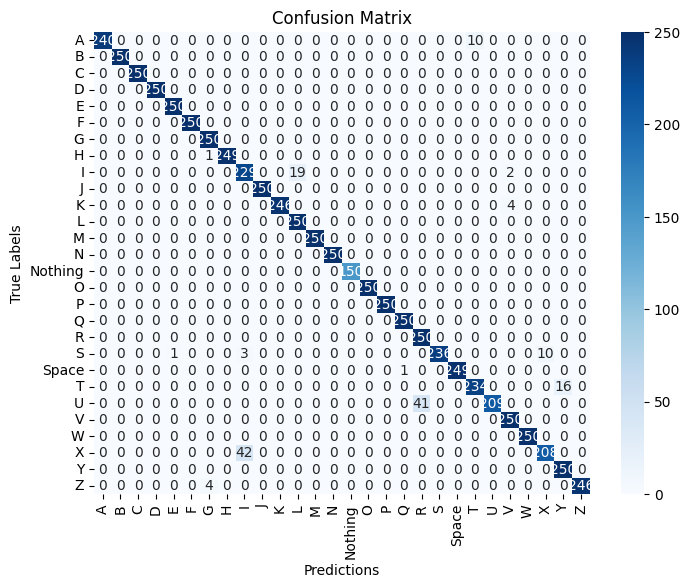

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = test_generator.classes

# Get the number of test samples
num_test_samples = len(test_generator.filenames)

# Get predictions for the entire test dataset
predictions = model.predict(test_generator, steps=num_test_samples // test_generator.batch_size + 1)

# Extract predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)

# Define plot_value_array function
def plot_value_array(i, predictions_array, true_label, class_names):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

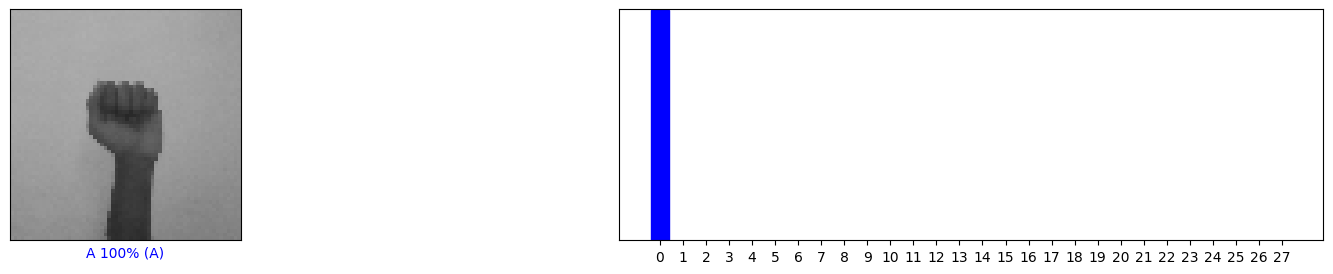

In [54]:
i = 1
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_generator.classes, test_generator[i][0], class_names)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_generator.classes, class_names)
plt.show()

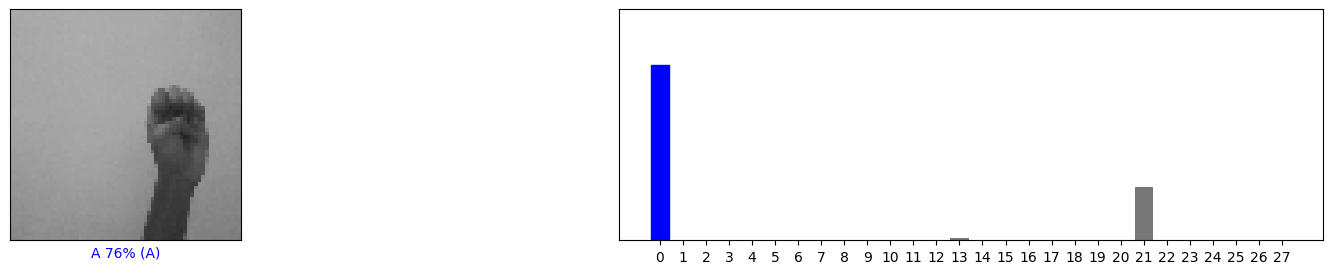

In [55]:
i = 31
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_generator.classes, test_generator[i][0], class_names)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_generator.classes, class_names)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

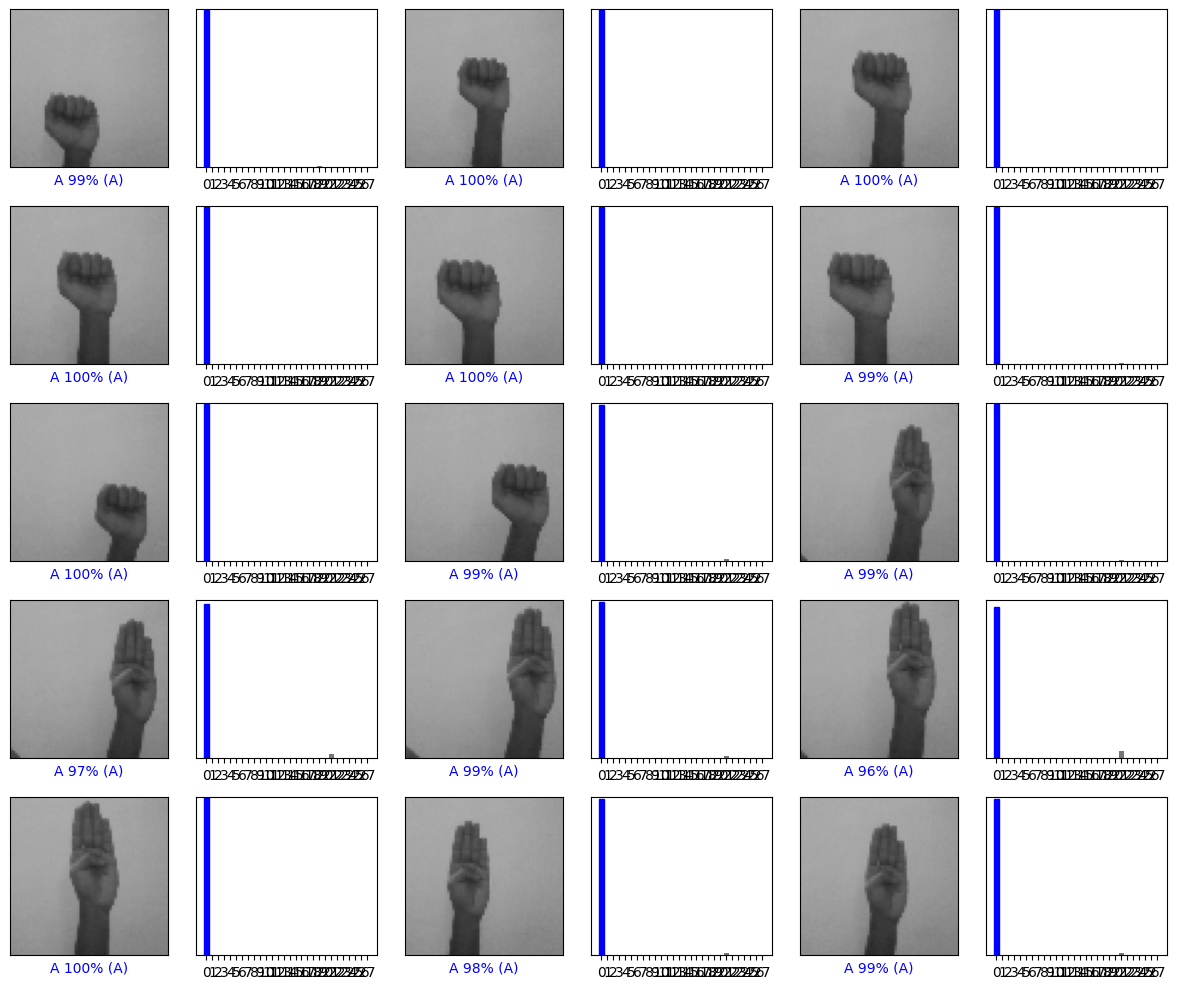

In [44]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_generator.classes, test_generator[i][0], class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_generator.classes, class_names)
plt.tight_layout()
plt.show()